In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import sys
import os

import Binary_reader

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from scipy.linalg import svd
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [35]:
folder_path = "/home/torps/CommSense/Datadump/Testing/Wheelchair_Testing/2/Bin/"
complete_data, original_data = Binary_reader.get_pandas_dataFrame(folder_path)
complete_data

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,Target
0,0.202005+0.191431j,0.204659+0.215591j,0.207382+0.233646j,0.210417+0.243352j,0.213798+0.245639j,0.217232+0.243334j,0.220422+0.239263j,0.223074+0.236254j,0.224894+0.237132j,0.226146+0.242785j,...,0.139254-0.196849j,0.139521-0.196104j,0.139562-0.195777j,0.139960-0.196187j,0.141303-0.197654j,0.144175-0.200494j,0.149951-0.206196j,0.159061-0.215088j,0.170677-0.225754j,0
1,0.215055+0.148087j,0.217689+0.174016j,0.220262+0.196860j,0.222885+0.215367j,0.226398+0.221244j,0.230217+0.220368j,0.233875+0.217063j,0.237152+0.213683j,0.240528+0.210603j,0.243175+0.213479j,...,0.118783-0.203137j,0.120532-0.203201j,0.120839-0.203183j,0.121060-0.203725j,0.121233-0.204948j,0.120049-0.207116j,0.122018-0.211883j,0.129933-0.220083j,0.141047-0.230298j,0
2,0.228150+0.100688j,0.230703+0.128678j,0.233032+0.157344j,0.235454+0.182618j,0.238368+0.198097j,0.242201+0.201114j,0.246237+0.198783j,0.250529+0.193756j,0.255670+0.188242j,0.260167+0.185105j,...,0.096729-0.209036j,0.101848-0.210601j,0.103337-0.211233j,0.102786-0.211649j,0.099665-0.212201j,0.095474-0.214656j,0.093314-0.218427j,0.097366-0.224343j,0.106960-0.232928j,0
3,0.241237+0.052482j,0.243551+0.083811j,0.245795+0.115497j,0.248201+0.144067j,0.250958+0.165860j,0.254443+0.175463j,0.258704+0.175607j,0.264277+0.172249j,0.270436+0.166085j,0.276034+0.159569j,...,0.073514-0.214865j,0.077163-0.215788j,0.080290-0.217236j,0.078873-0.217612j,0.074525-0.219274j,0.069235-0.221798j,0.065141-0.224733j,0.064945-0.228237j,0.071821-0.233686j,0
4,0.254204+0.007309j,0.256498+0.039791j,0.258793+0.072273j,0.261267+0.101700j,0.264100+0.125020j,0.267470+0.139177j,0.272229+0.143427j,0.278442+0.140972j,0.285109+0.134679j,0.291234+0.127413j,...,0.044129-0.218256j,0.047025-0.219060j,0.048862-0.220066j,0.047828-0.221432j,0.043663-0.223254j,0.038435-0.225406j,0.034213-0.227762j,0.033064-0.230198j,0.037056-0.232588j,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31327,0.396946+0.089985j,0.395768+0.096033j,0.392628+0.101855j,0.389289+0.106380j,0.386849+0.107659j,0.385164+0.105104j,0.384381+0.101397j,0.385548+0.099340j,0.387663+0.102367j,0.389960+0.106828j,...,-0.108623+0.079026j,-0.109093+0.083491j,-0.107780+0.084112j,-0.105295+0.083314j,-0.101671+0.081406j,-0.096984+0.078565j,-0.091956+0.075979j,-0.087489+0.075874j,-0.082858+0.077236j,0
31328,0.407083+0.065840j,0.403719+0.073161j,0.399387+0.080352j,0.395182+0.086771j,0.391976+0.091424j,0.390239+0.092449j,0.390225+0.091832j,0.391652+0.095723j,0.393798+0.101254j,0.396294+0.106016j,...,-0.114515+0.078401j,-0.115543+0.087834j,-0.115159+0.091084j,-0.113040+0.091486j,-0.109457+0.090073j,-0.104766+0.087185j,-0.099517+0.083820j,-0.094405+0.081469j,-0.089933+0.081781j,0
31329,0.415154+0.045457j,0.410941+0.053891j,0.406089+0.062365j,0.401438+0.070188j,0.397825+0.076668j,0.396090+0.081115j,0.396248+0.085577j,0.397518+0.091615j,0.399537+0.097806j,0.401945+0.102727j,...,-0.119495+0.077474j,-0.121089+0.088748j,-0.121241+0.095521j,-0.119599+0.097467j,-0.116289+0.096648j,-0.111841+0.094124j,-0.106784+0.090956j,-0.101649+0.088205j,-0.096964+0.086932j,0
31330,0.420074+0.038520j,0.415338+0.052287j,0.410496+0.062369j,0.406057+0.070332j,0.403141+0.073332j,0.402855+0.073340j,0.404084+0.076925j,0.405828+0.083389j,0.407855+0.089545j,0.410042+0.094176j,...,-0.123153+0.077770j,-0.125396+0.088587j,-0.125828+0.096161j,-0.124655+0.101063j,-0.121948+0.101918j,-0.118049+0.100507j,-0.113523+0.098223j,-0.108876+0.095766j,-0.104257+0.093525j,0


In [36]:
train_data, temp_test_data = train_test_split(complete_data, test_size=0.4, random_state=0)

In [37]:
dataset_0 = train_data[train_data['Target'] == 0]
dataset_1 = train_data[train_data['Target'] == 1]

In [38]:
labels_0 = dataset_0.pop('Target')
labels_1 = dataset_1.pop('Target')

dataset_0=np.abs(dataset_0)
dataset_1=np.abs(dataset_1)

In [39]:

dataset_0.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
7977,0.362610,0.362771,0.362660,0.362264,0.361503,0.360285,0.358390,0.355896,0.353208,0.350677,...,0.316876,0.317502,0.317995,0.318256,0.318300,0.318243,0.318130,0.317991,0.317839,0.317685
19628,0.255646,0.271116,0.283195,0.290594,0.293825,0.294514,0.294276,0.294717,0.297438,0.303094,...,0.165055,0.163607,0.161214,0.158719,0.156973,0.156821,0.159147,0.165682,0.176549,0.190173
1105,0.548029,0.511365,0.484075,0.468264,0.462892,0.461713,0.462435,0.461625,0.458925,0.456753,...,0.313768,0.313909,0.313924,0.313681,0.313317,0.312710,0.312469,0.312894,0.313375,0.313515
553,0.375621,0.374828,0.372477,0.368013,0.362190,0.355841,0.350027,0.345712,0.343567,0.344039,...,0.249827,0.249410,0.248994,0.248427,0.247512,0.246016,0.243712,0.239553,0.233339,0.226195
16802,0.218405,0.232879,0.248391,0.262646,0.272312,0.275627,0.276120,0.275093,0.274659,0.275921,...,0.251108,0.252421,0.255719,0.255851,0.255243,0.255279,0.259075,0.266421,0.279988,0.300888


In [40]:
dataset_0 = np.abs(dataset_0)
dataset_1 = np.abs(dataset_1)

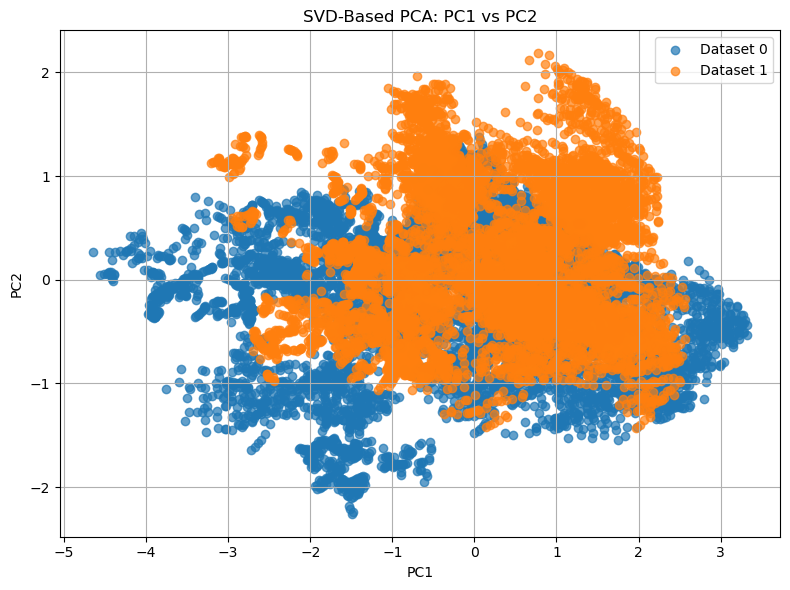

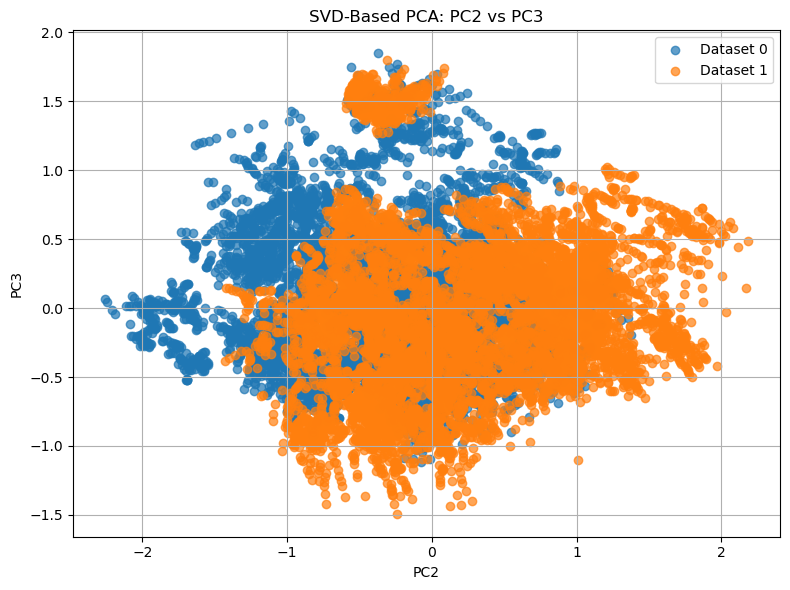

In [42]:

# Step 1: Combine the datasets
combined_data = np.vstack([dataset_0, dataset_1])

# Step 2: Center the combined data
mean_vector = np.mean(combined_data, axis=0)
combined_centered = combined_data - mean_vector

# Step 3: Perform SVD
U, S, Vt = svd(combined_centered, full_matrices=False)

# Step 4: Project onto principal components (scores)
principal_components = U @ np.diag(S)  # Equivalent to combined_centered @ Vt.T

# Step 5: Split the principal components back
n0 = len(dataset_0)
principal_components_0 = principal_components[:n0, :]
principal_components_1 = principal_components[n0:, :]

# # Step 6: Keep only the first k components
# k = 2
# pc0 = principal_components_0[:, :k]
# pc1 = principal_components_1[:, :k]

# # Step 7: Make DataFrames for plotting
# df0 = pd.DataFrame(pc0, columns=[f"PC{i+1}" for i in range(k)])
# df1 = pd.DataFrame(pc1, columns=[f"PC{i+1}" for i in range(k)])

# # Step 8: Plot
# plt.figure(figsize=(8, 6))
# plt.scatter(df0["PC1"], df0["PC2"], label="Dataset 0", alpha=0.7)
# plt.scatter(df1["PC1"], df1["PC2"], label="Dataset 1", alpha=0.7)
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("SVD-Based PCA of Combined Datasets")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# Step 6: Keep the first 3 components (to get PC1, PC2, PC3)
k = 3
pc0 = principal_components_0[:, :k]
pc1 = principal_components_1[:, :k]

# Step 7: Make DataFrames for plotting
df0 = pd.DataFrame(pc0, columns=[f"PC{i+1}" for i in range(k)])
df1 = pd.DataFrame(pc1, columns=[f"PC{i+1}" for i in range(k)])

# Step 8: Plot component pairs 1 vs 2 and 2 vs 3
for i in range(k - 1):
    plt.figure(figsize=(8, 6))
    x_col = f"PC{i+1}"
    y_col = f"PC{i+2}"
    
    plt.scatter(df0[x_col], df0[y_col], label="Dataset 0", alpha=0.7)
    plt.scatter(df1[x_col], df1[y_col], label="Dataset 1", alpha=0.7)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"SVD-Based PCA: {x_col} vs {y_col}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
